In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset, using different encoding due to non printable ascii characters

df = pd.read_csv('./datasets/spotify-2023.csv', encoding="latin")

# Test if dataset is loaded
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


# Defining Data

### track_name
Name of the song

### artist(s)_name
Name of the artist(s) of the song

### artist_count
Number of artists contributing to the song

### released_year
Year when the song was released

### released_month
Month when the song was released

### released_day
Day of the month when the song was released

### in_spotify_playlists 
Number of Spotify playlists the song is included in

### in_spotify_charts
Presence and rank of the song on Spotify charts

### streams
Total number of streams on Spotify

### in_apple_playlists
Number of Apple Music playlists the song is included in

### in_apple_charts
Presence and rank of the song on Apple Music charts

### in_deezer_playlists
Number of Deezer playlists the song is included in

### in_deezer_charts
Presence and rank of the song on Deezer charts

### in_shazam_charts
Presence and rank of the song on Shazam charts

### bpm
The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

### key
The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

### mode
Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

### danceability_%
Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

### valence_%
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

### energy_%
Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

### acousticness_%
A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

### instrumentalness_%
Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.


### liveness_%
Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.


### speechiness_%
Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.


# EDA

1. Display information about dataset

In [3]:
# Display info of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            952 non-null    object
 1   artist(s)_name        952 non-null    object
 2   artist_count          952 non-null    int64 
 3   released_year         952 non-null    int64 
 4   released_month        952 non-null    int64 
 5   released_day          952 non-null    int64 
 6   in_spotify_playlists  952 non-null    int64 
 7   in_spotify_charts     952 non-null    int64 
 8   streams               952 non-null    int64 
 9   in_apple_playlists    952 non-null    int64 
 10  in_apple_charts       952 non-null    int64 
 11  in_deezer_playlists   952 non-null    object
 12  in_deezer_charts      952 non-null    int64 
 13  in_shazam_charts      902 non-null    object
 14  bpm                   952 non-null    int64 
 15  key                   857 non-null    ob

- From this, we can tell that there are null values, which we will later remove

In [4]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,9.520000e+02,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000
mean,1.556723,2018.288866,6.038866,13.944328,5202.565126,12.022059,5.141374e+08,67.866597,51.963235,2.669118,122.553571,66.984244,51.406513,64.274160,27.078782,1.582983,18.214286,10.138655
std,0.893331,11.011397,3.564571,9.197223,7901.400683,19.582405,5.668569e+08,86.470591,50.628850,6.038152,28.069601,14.631282,23.480526,16.558517,26.001599,8.414064,13.718374,9.915399
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,874.500000,0.000000,1.416362e+08,13.000000,7.000000,0.000000,99.750000,57.000000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2216.500000,3.000000,2.905309e+08,34.000000,38.500000,0.000000,121.000000,69.000000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5573.750000,16.000000,6.738690e+08,88.000000,87.000000,2.000000,140.250000,78.000000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,58.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


# Cleaning the dataset

1. The dataset contains some empty values. We will drop all rows that contain any empty values. 

In [5]:
# Drops values that are empty

df.dropna(axis=0, how='any', inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 0 to 951
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            816 non-null    object
 1   artist(s)_name        816 non-null    object
 2   artist_count          816 non-null    int64 
 3   released_year         816 non-null    int64 
 4   released_month        816 non-null    int64 
 5   released_day          816 non-null    int64 
 6   in_spotify_playlists  816 non-null    int64 
 7   in_spotify_charts     816 non-null    int64 
 8   streams               816 non-null    int64 
 9   in_apple_playlists    816 non-null    int64 
 10  in_apple_charts       816 non-null    int64 
 11  in_deezer_playlists   816 non-null    object
 12  in_deezer_charts      816 non-null    int64 
 13  in_shazam_charts      816 non-null    object
 14  bpm                   816 non-null    int64 
 15  key                   816 non-null    object


2. Some integers contain ",". We will remove all "," within the dataset so the strings can be converted to integers properly.

In [6]:
target_columns = ["in_deezer_playlists", "in_shazam_charts"]

print(df["in_shazam_charts"].iloc[12])

for column in target_columns:
    df[column] = df[column].apply(lambda x: x.replace(",", ""))

print(df["in_shazam_charts"].iloc[12])

1,281
1281


3. We choose to sum up chart appearances and playlists appearances into their individual columns

In [7]:
def combine_columns(data: pd.DataFrame, result: str, targets: list):
    data[result] = data[targets].astype(int).sum(axis=1)
    for target in targets:
        data.drop(target, axis=1, inplace=True)

combine_columns(df, "in_charts", ['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts'])
combine_columns(df, "in_playlists", ['in_spotify_playlists','in_apple_playlists','in_deezer_playlists'])

df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,streams,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,in_charts,in_playlists
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,141381703,826,125,B,Major,80,89,83,31,0,8,4,420,641
1,LALA,Myke Towers,1,2023,3,23,133716286,382,92,C#,Major,71,61,74,7,0,10,4,188,1580
2,vampire,Olivia Rodrigo,1,2023,6,30,140003974,949,138,F,Major,51,32,53,17,0,31,6,334,1582
3,Cruel Summer,Taylor Swift,1,2019,8,23,800840817,548,170,A,Major,55,58,72,11,0,11,15,319,8099
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,303236322,425,144,A,Minor,65,23,80,14,63,11,6,198,3304


4. Notice how older songs have more streams? Older songs have an advantage over newer songs in terms of streams, which will effect our anaylsis as the popularity of newer songs would be inaccurately potrayed. To fix this, we make a new column called 'streams_per_month' to balance the streams out by months since release.

In [8]:
current_year = 2024
current_month = 3
df['months_since_release'] = ((current_year - df['released_year']) * 12) + (current_month - df['released_month']) 
df['streams_per_month'] = df['streams'] / df['months_since_release']
df['streams_per_month'] = df['streams_per_month'].astype('int')

df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,streams,in_shazam_charts,bpm,key,...,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,in_charts,in_playlists,months_since_release,streams_per_month
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,141381703,826,125,B,...,89,83,31,0,8,4,420,641,8,17672712
1,LALA,Myke Towers,1,2023,3,23,133716286,382,92,C#,...,61,74,7,0,10,4,188,1580,12,11143023
2,vampire,Olivia Rodrigo,1,2023,6,30,140003974,949,138,F,...,32,53,17,0,31,6,334,1582,9,15555997
3,Cruel Summer,Taylor Swift,1,2019,8,23,800840817,548,170,A,...,58,72,11,0,11,15,319,8099,55,14560742
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,303236322,425,144,A,...,23,80,14,63,11,6,198,3304,10,30323632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,My Mind & Me,Selena Gomez,1,2022,11,3,91473363,0,144,A,...,24,39,57,0,8,3,14,1051,16,5717085
948,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,121871870,0,166,F#,...,7,24,83,1,12,6,0,1192,17,7168933
949,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,73513683,0,92,C#,...,81,67,4,0,8,6,0,582,16,4594605
950,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,133895612,0,97,C#,...,67,77,8,0,12,5,26,1366,17,7876212


# Data Visualisation

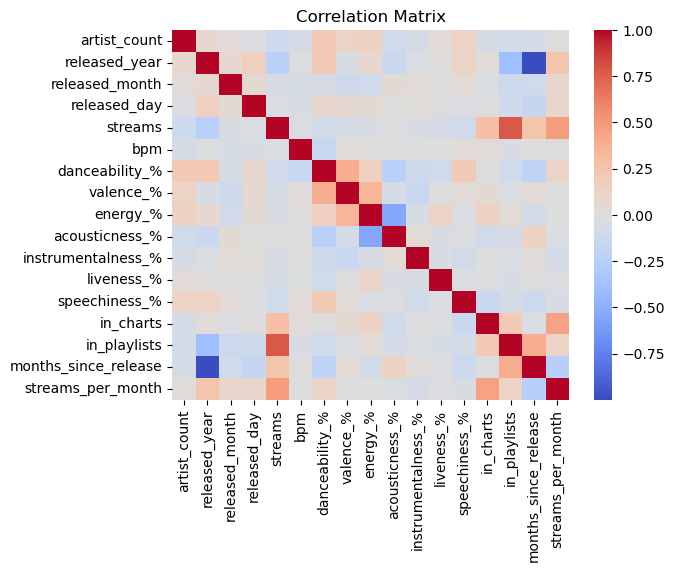

In [9]:
# Plot a correlation matrix

cmatrix = df.corr(numeric_only=True)

sns.heatmap(cmatrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

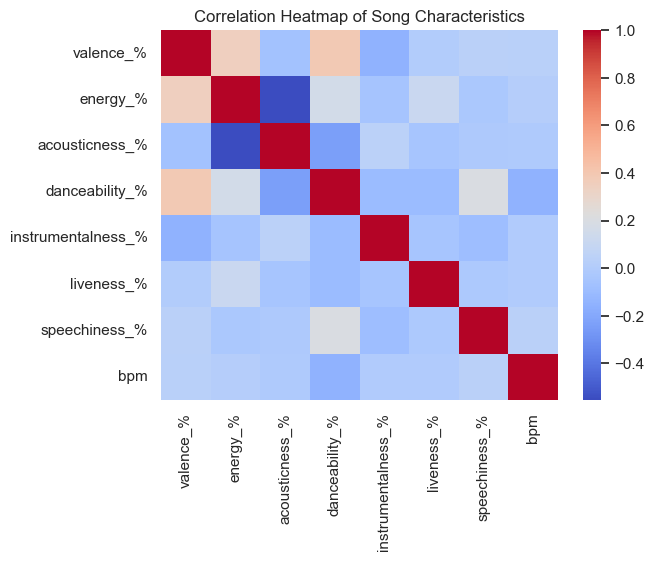

In [39]:
# Plot a correlation matrix of song characteristics
features = df[['valence_%', 'energy_%', 'acousticness_%', 'danceability_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'bpm']]

cmatrix = features.corr()

sns.heatmap(cmatrix, cmap='coolwarm')
plt.title('Correlation Heatmap of Song Characteristics')
plt.show()


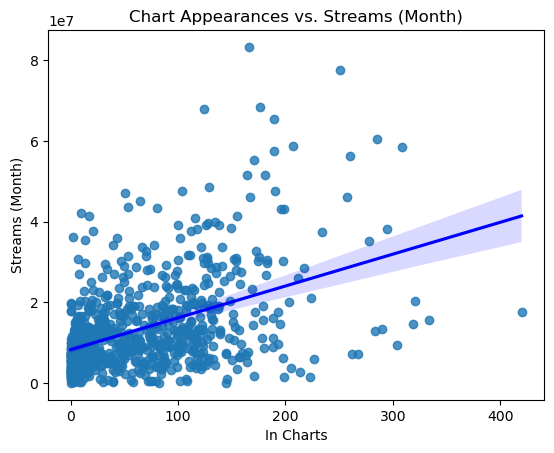

In [11]:
# Plot scatterplot of streams against chart appearances, as well as a best fit line to represent the trend

sns.regplot(data=df, x='in_charts', y='streams_per_month', line_kws={'color': 'blue'})
plt.xlabel('In Charts')
plt.ylabel('Streams (Month)')
plt.title('Chart Appearances vs. Streams (Month)')
plt.show()

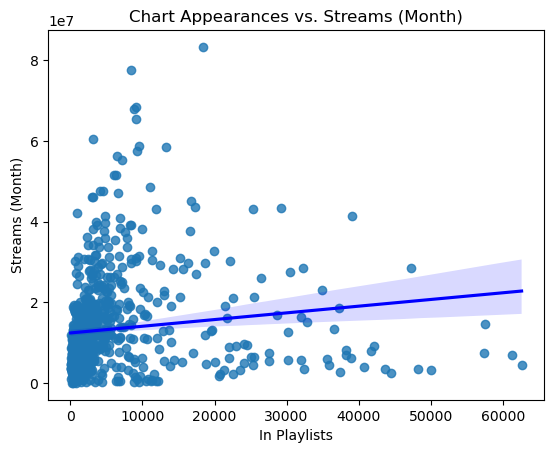

In [12]:
# Plot scatterplot of streams against playlist appearances, as well as a best fit line to represent the trend

sns.regplot(data=df, x='in_playlists', y='streams_per_month', line_kws={'color': 'blue'})
plt.xlabel('In Playlists')
plt.ylabel('Streams (Month)')
plt.title('Chart Appearances vs. Streams (Month)')
plt.show()

- This proves that number of **streams** is directly proportional to **chart appearances**, as well as **playlist appearances**.

<Axes: xlabel='bpm', ylabel='streams_per_month'>

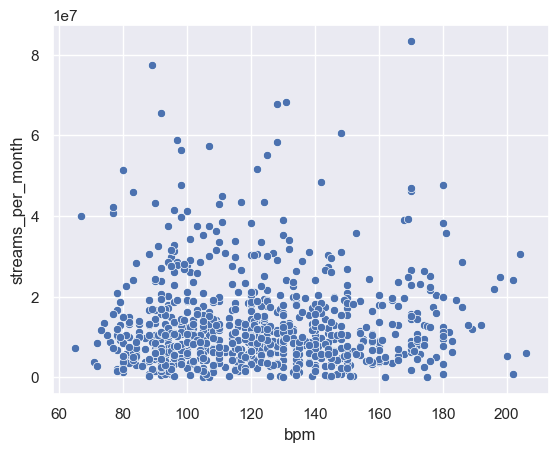

In [35]:
sns.scatterplot(x='bpm', y='streams_per_month', data=df)

- From this scatterplot, we can see that people prefer to listen to songs with a bpm >= 80 and <=180. Songs out of that range tend to have lower streams.

<Axes: xlabel='mode', ylabel='streams_per_month'>

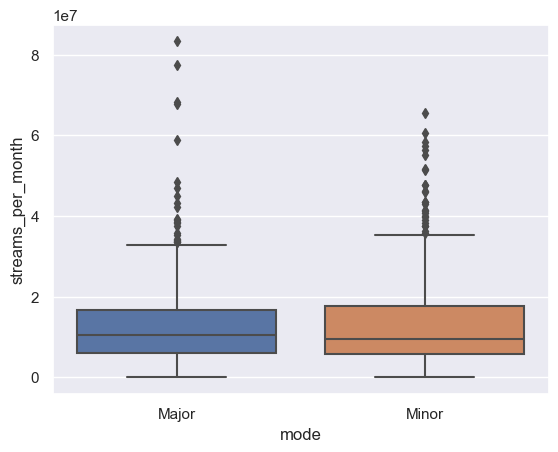

In [36]:
sns.boxplot(x='mode', y='streams_per_month', data=df)

- Firstly, songs in minor have a larger IQR, which indicates a higher range in streams, leaning towards the higher side.
- Songs in major, however, despite having lower average streams, has a quite a few songs that has done exceptionally better than songs in minor keys.
- This indicates that if done right, songs in major have potentially to become a big hit.

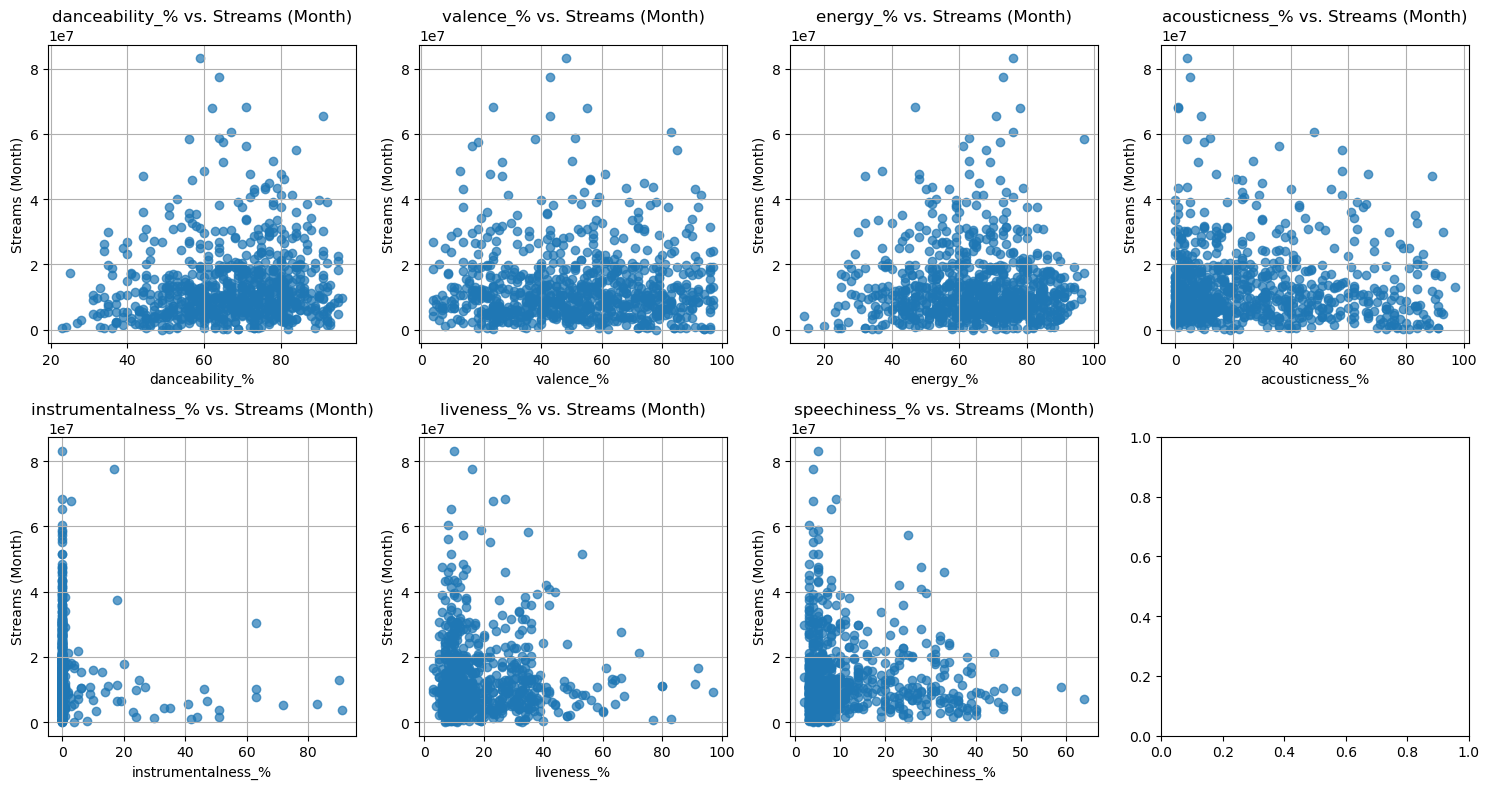

In [14]:
# Plot % against streams

features_to_plot = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

fig, axes = plt.subplots(2, 4, figsize=(15,8))

for i, feature in enumerate(features_to_plot):
   col, row = divmod(i, 4)
   axes[col, row].scatter(df[feature], df['streams_per_month'], alpha=0.7)
   axes[col, row].set_xlabel(feature)
   axes[col, row].set_ylabel('Streams (Month)')
   axes[col, row].set_title(f'{feature} vs. Streams (Month)')
   axes[col, row].grid(True)

plt.tight_layout()
plt.show()

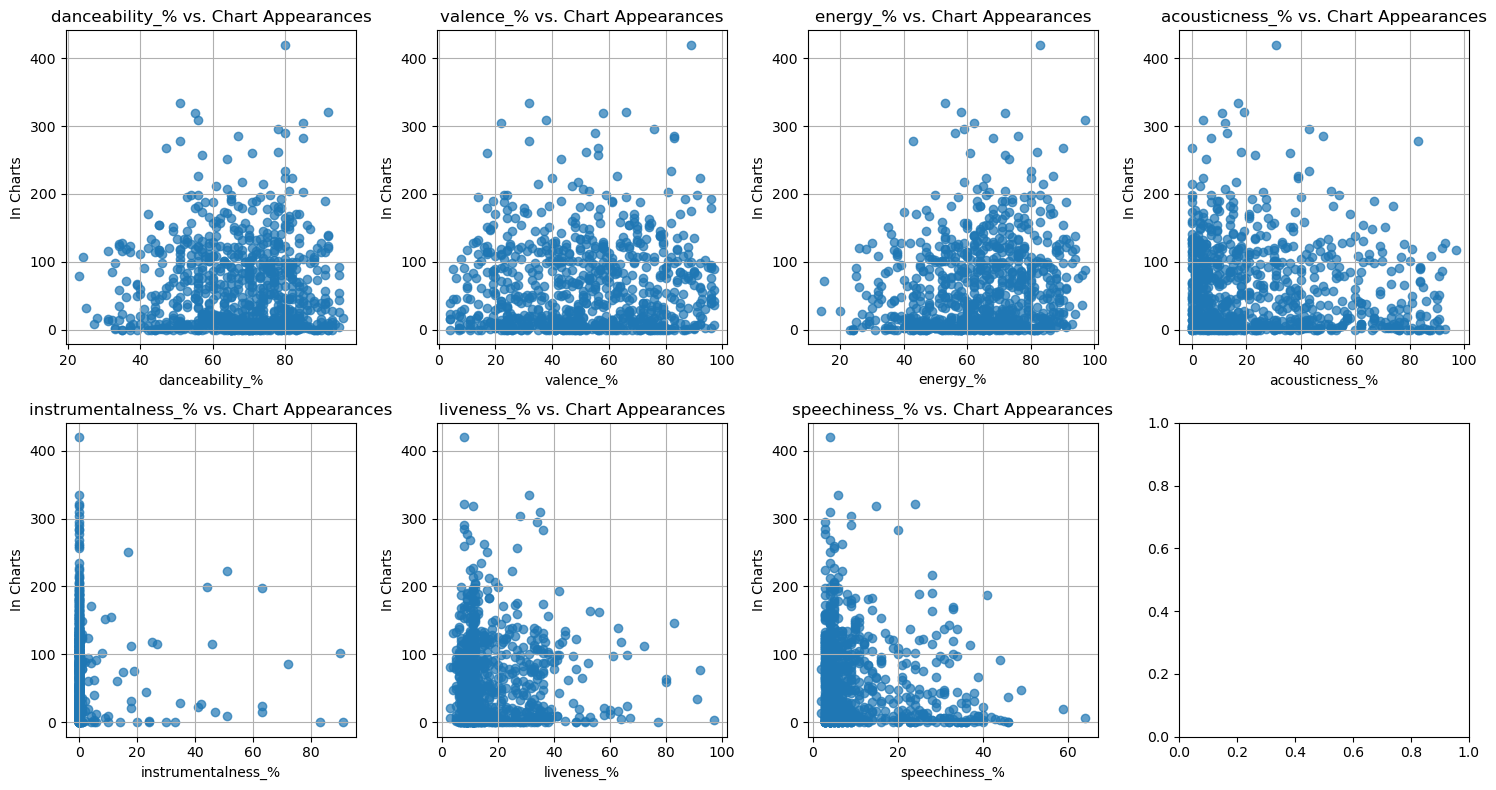

In [15]:
# Plot % against chart appearances

features_to_plot = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

fig, axes = plt.subplots(2, 4, figsize=(15,8))

for i, feature in enumerate(features_to_plot):
   col, row = divmod(i, 4)
   axes[col, row].scatter(df[feature], df['in_charts'], alpha=0.7)
   axes[col, row].set_xlabel(feature)
   axes[col, row].set_ylabel('In Charts')
   axes[col, row].set_title(f'{feature} vs. Chart Appearances')
   axes[col, row].grid(True)

plt.tight_layout()
plt.show()

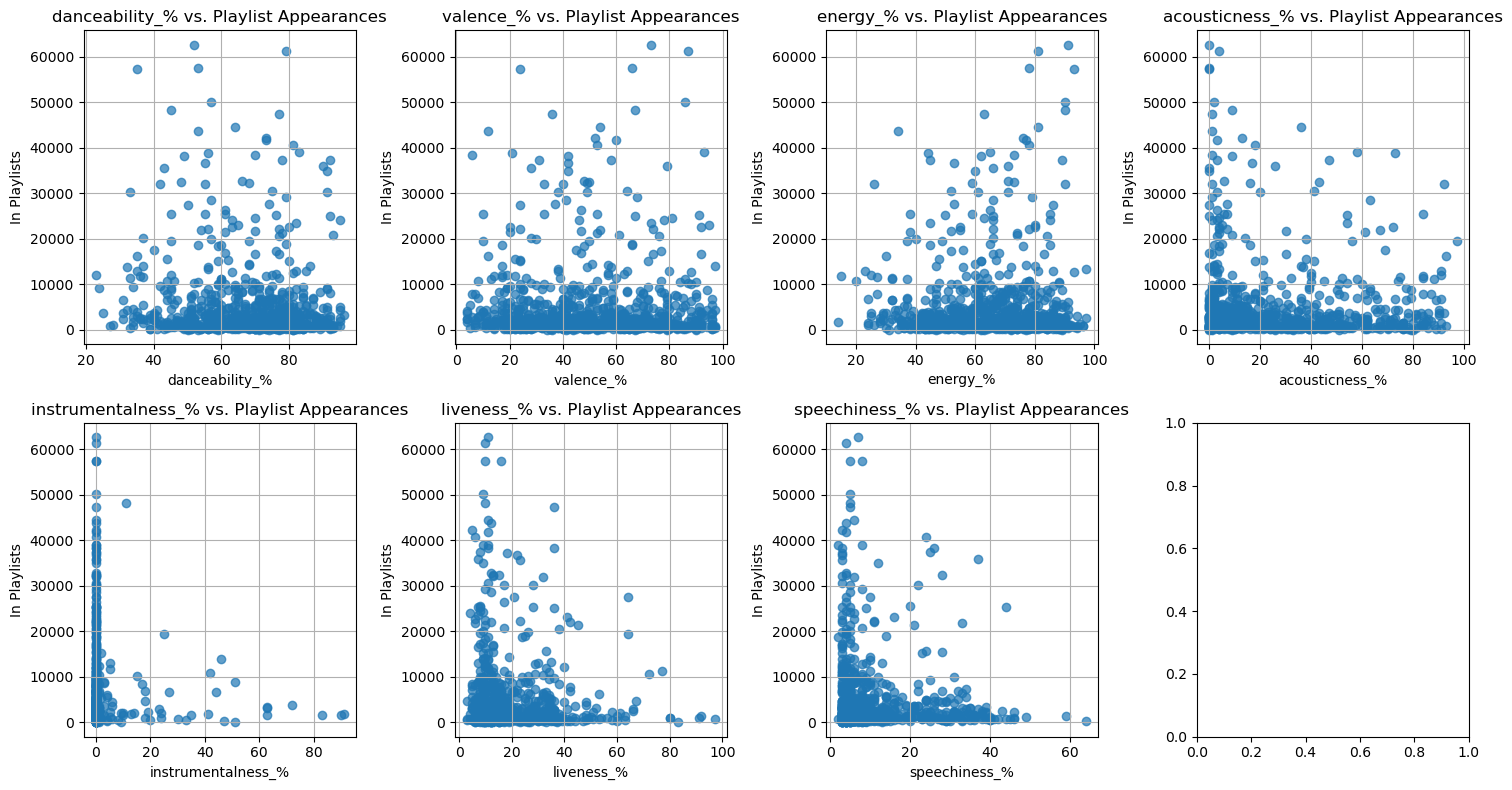

In [16]:
# Plot % against playlist appearances

features_to_plot = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

fig, axes = plt.subplots(2, 4, figsize=(15,8))

for i, feature in enumerate(features_to_plot):
   col, row = divmod(i, 4)
   axes[col, row].scatter(df[feature], df['in_playlists'], alpha=0.7)
   axes[col, row].set_xlabel(feature)
   axes[col, row].set_ylabel('In Playlists')
   axes[col, row].set_title(f'{feature} vs. Playlist Appearances')
   axes[col, row].grid(True)

plt.tight_layout()
plt.show()

- Top songs are at least 20% **danceable**
- Distribution of **valence** is balanced
- Top songs have at least 20% **energy**
- **Acousticness** of top songs may vary, but the ones that are the least **acoustic** have the most streams
- Top songs are mostly not **instrumental**, indicating that they have vocals
- Top songs have low **liveness**, indicating that they are unlikely to be recorded with a live audience
- Most songs top songs have low to medium **speechiness**, indicating that most songs have vocals but not all have spoken words

# Modelling

We will create a regression model as we are predicting continuous data.

We will be evaluating on 3 different values:
- "in_charts"
- "in_playlists"
- "streams"

In [18]:
x = df.drop("in_charts", axis=1).drop("in_playlists", axis=1).drop("streams", axis=1)
y1 = df["in_charts"]
y2 = df["in_playlists"]
y3 = df["streams"]

x.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,months_since_release,streams_per_month
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,826,125,B,Major,80,89,83,31,0,8,4,8,17672712
1,LALA,Myke Towers,1,2023,3,23,382,92,C#,Major,71,61,74,7,0,10,4,12,11143023
2,vampire,Olivia Rodrigo,1,2023,6,30,949,138,F,Major,51,32,53,17,0,31,6,9,15555997
3,Cruel Summer,Taylor Swift,1,2019,8,23,548,170,A,Major,55,58,72,11,0,11,15,55,14560742
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,425,144,A,Minor,65,23,80,14,63,11,6,10,30323632


We will convert:

- "key"
- "mode"

to dummy variables.

In [19]:
def convert_to_dummy(data: pd.DataFrame, target: str):
    dummies = pd.get_dummies(data[target], dtype=int)
    data.drop(target, inplace=True, axis=1)
    return pd.concat([data, dummies], axis=1)

x = convert_to_dummy(x, "key")
x = convert_to_dummy(x, "mode")
x.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_shazam_charts,bpm,danceability_%,valence_%,...,C#,D,D#,E,F,F#,G,G#,Major,Minor
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,826,125,80,89,...,0,0,0,0,0,0,0,0,1,0
1,LALA,Myke Towers,1,2023,3,23,382,92,71,61,...,1,0,0,0,0,0,0,0,1,0
2,vampire,Olivia Rodrigo,1,2023,6,30,949,138,51,32,...,0,0,0,0,1,0,0,0,1,0
3,Cruel Summer,Taylor Swift,1,2019,8,23,548,170,55,58,...,0,0,0,0,0,0,0,0,1,0
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,425,144,65,23,...,0,0,0,0,0,0,0,0,0,1


We will drop:
- "track_name"
- "released_month"
- "released_day"
- "artist(s)_name"

In [20]:
to_drop = ["track_name", "released_month", "released_day", "artist(s)_name"]

for targets in to_drop:
    x.drop(targets, inplace=True, axis=1)

x.head()

,artist_count,released_year,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,...,C#,D,D#,E,F,F#,G,G#,Major,Minor
0,2,2023,826,125,80,89,83,31,0,8,...,0,0,0,0,0,0,0,0,1,0
1,1,2023,382,92,71,61,74,7,0,10,...,1,0,0,0,0,0,0,0,1,0
2,1,2023,949,138,51,32,53,17,0,31,...,0,0,0,0,1,0,0,0,1,0
3,1,2019,548,170,55,58,72,11,0,11,...,0,0,0,0,0,0,0,0,1,0
4,1,2023,425,144,65,23,80,14,63,11,...,0,0,0,0,0,0,0,0,0,1


Split data up into training and testing data.

In [21]:
from sklearn.model_selection import train_test_split

x1_train, x1_val, y1_train, y1_val = train_test_split(x, y1, test_size=0.3, random_state=42)
x2_train, x2_val, y2_train, y2_val = train_test_split(x, y2, test_size=0.3, random_state=42)
x3_train, x3_val, y3_train, y3_val = train_test_split(x, y3, test_size=0.3, random_state=42)

In [22]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

def evalulate_model(model, x_val, y_val):
    y_pred = model.predict(x_val)
    acc = model.score(x_val, y_val)
    r2 = r2_score(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    print("Accuracy: {:.3f} | r^2: {:.3f} | mse: {:.3f} | rmse: {:.3f}".format(acc, r2, mse, rmse))

In [23]:
from sklearn.linear_model import LinearRegression

lr1 = LinearRegression()
lr1.fit(x1_train, y1_train)
evalulate_model(lr1, x1_val, y1_val)

lr2 = LinearRegression()
lr2.fit(x2_train, y2_train)
evalulate_model(lr2, x2_val, y2_val)

lr3 = LinearRegression()
lr3.fit(x3_train, y3_train)
evalulate_model(lr3, x3_val, y3_val)


Accuracy: 0.334 | r^2: 0.334 | mse: 2577.173 | rmse: 50.766
Accuracy: 0.186 | r^2: 0.186 | mse: 69613994.656 | rmse: 8343.500
Accuracy: 0.345 | r^2: 0.345 | mse: 193076399777612480.000 | rmse: 439404596.901


In [24]:
from sklearn.tree import DecisionTreeRegressor

tree1 = DecisionTreeRegressor()
tree1.fit(x1_train, y1_train)
evalulate_model(tree1, x1_val, y1_val)

tree2 = DecisionTreeRegressor()
tree2.fit(x2_train, y2_train)
evalulate_model(tree2, x2_val, y2_val)


tree3 = DecisionTreeRegressor()
tree3.fit(x3_train, y3_train)
evalulate_model(tree3, x3_val, y3_val)

Accuracy: -0.012 | r^2: -0.012 | mse: 3920.600 | rmse: 62.615
Accuracy: 0.540 | r^2: 0.540 | mse: 39330521.273 | rmse: 6271.405
Accuracy: 0.866 | r^2: 0.866 | mse: 39373604408063544.000 | rmse: 198427831.738


In [25]:
from sklearn.svm import SVR

svm1 = SVR()
svm1.fit(x1_train, y1_train)
evalulate_model(svm1, x1_val, y1_val)

svm2 = SVR()
svm2.fit(x2_train, y2_train)
evalulate_model(svm2, x1_val, y1_val)

svm3 = SVR()
svm3.fit(x3_train, y3_train)
evalulate_model(tree1, x1_val, y1_val)

Accuracy: 0.080 | r^2: 0.080 | mse: 3563.228 | rmse: 59.693
Accuracy: -1074.144 | r^2: -1074.144 | mse: 4163479.531 | rmse: 2040.461
Accuracy: -0.012 | r^2: -0.012 | mse: 3920.600 | rmse: 62.615
